In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
sns.set()
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import ceil,floor
import pickle
pd.set_option("display.max_columns",500)

In [3]:
df= pd.read_excel("electricity.xlsx", skiprows=[0])

In [4]:
df.to_excel('cleaned_file.xlsx', index=False)

In [18]:
df.head()

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Appartment,36,1.0,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12,3.024000
1,Appartment,36,1.0,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09,2.788235
2,Appartment,95,2.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14,11.520000
3,Appartment,95,2.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12,9.504132
4,Appartment,80,2.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"40,000€ - 60,000€",Often or Always,2022-02-22,9.458333


In [20]:
df.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                    float64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [21]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [24]:
#A1
train.reset_index(drop=True,inplace=True)

In [25]:
df.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             3
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64

In [26]:
#A2
train.dropna(inplace=True)

In [27]:
df.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             3
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64

In [31]:
#A3
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)

In [32]:
train.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             0
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64

In [33]:
#A4
train['Bedrooms']=train['Bedrooms'].astype('int64')

In [34]:
#A5
train['Income']=train['Income'].str.replace('€','')
train["Income"]=train["Income"].str.replace('άνω των','')
train['Income']=train['Income'].str.replace(',','')
train['Income']=train['Income'].str.replace('600001','600001')
train['Income']=train['Income'].str.replace(' 600001','600001')


In [35]:
#A6
train['Month_of_year']=train['Date'].dt.month
train['Day_of_Month']=train['Date'].dt.day
train['Is_weekend']=train['Date'].dt.dayofweek.isin([5,6]).astype('int64')
train['Kwh/day']=round(train['Kwh/day'],2)
train['Energy_usage_per_person']=round(train['Kwh/day']/train['Occupants'],2)



In [36]:
#A7
train['Education_Index']= round(train['Education_Index'],2)
train['Employment rate']= round((train['Full_Time_Worker'] + train['Part-Time_Worker'])/train['Occupants'],2)


C:\Users\ihotuadegbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Kwh/day'>

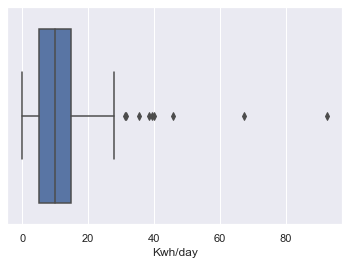

In [37]:
sns.boxplot(train['Kwh/day'])

In [38]:
#A8
def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    data.reset_index(drop=True,inplace=True)
    return data

In [39]:
train = cap_outlier(train,'Kwh/day')

C:\Users\ihotuadegbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Kwh/day'>

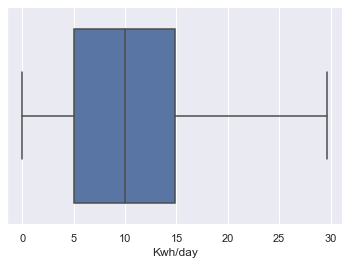

In [40]:
sns.boxplot(train['Kwh/day'])

In [43]:
#A9
X_train=train.drop(['Kwh/day','Date'], axis=1)
y_train=train['Kwh/day']

In [44]:
#10
Hou_type=['Apartment', 'Semidetached', 'Townhome', 'Family House']

Year_buit=['0 - 5', '6 - 15', '16 - 30', '30+']

Inc_typ=['10001 - 20000', '0 - 10000', '20001 - 40000', '40000 - 60000','600001']


Ene_cls=['Sometimes', 'Rarely', 'Often or Always']

In [46]:
category=[]
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        category.append(i)
category

['House_Type', 'Year_Built', 'Income', 'Energy_Class']

In [47]:
#a11
encoder= OrdinalEncoder()

X_train[category]=encoder.fit_transform(X_train[category])

In [48]:
col2=X_train.columns

In [49]:
col2

Index(['House_Type', 'Household_Size_m2', 'Bedrooms', 'Year_Built',
       'Occupants', 'Children', 'Teenagers', 'Adults', 'Elders',
       'Full_Time_Worker', 'Part-Time_Worker', 'Graduate', 'PostGraduate',
       'Education_Index', 'Income', 'Energy_Class', 'Month_of_year',
       'Day_of_Month', 'Is_weekend', 'Energy_usage_per_person',
       'Employment rate'],
      dtype='object')

In [50]:
#a13
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [51]:
X_train = pd.DataFrame(X_train, columns=col2)
X_train

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,0.000000,0.240000,0.4,0.000000,0.2,0.000000,0.000000,0.4,0.0,0.25,0.0,0.50,0.0,0.647059,0.25,1.0,0.727273,0.300000,0.0,0.070347,0.50
1,0.000000,0.165333,0.2,0.000000,0.6,0.000000,0.333333,0.6,0.0,0.50,0.5,0.50,0.0,0.470588,0.25,0.0,0.818182,0.200000,0.0,0.059662,0.75
2,0.666667,0.442667,0.6,1.000000,0.6,0.333333,0.333333,0.4,0.0,0.50,0.0,0.25,0.0,0.352941,0.25,1.0,1.000000,1.000000,0.0,0.166815,0.50
3,0.000000,0.200000,0.4,0.333333,0.6,0.000000,0.333333,0.6,0.0,0.25,0.5,0.50,0.0,0.470588,0.50,0.0,0.636364,0.600000,0.0,0.045414,0.50
4,0.000000,0.088000,0.0,1.000000,0.2,0.000000,0.000000,0.4,0.0,0.50,0.0,0.50,1.0,1.000000,0.50,1.0,0.090909,0.533333,0.0,0.058178,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.000000,0.053333,0.0,0.666667,0.0,0.000000,0.000000,0.2,0.0,0.00,0.0,0.25,0.0,0.647059,0.00,1.0,0.090909,0.733333,0.0,0.041259,0.00
140,0.000000,0.066667,0.0,1.000000,0.0,0.000000,0.000000,0.2,0.0,0.25,0.0,0.25,0.0,0.647059,0.25,1.0,0.636364,0.766667,0.0,0.121995,1.00
141,0.666667,0.226667,0.2,0.666667,0.2,0.000000,0.000000,0.4,0.0,0.25,0.0,0.25,0.0,0.352941,0.00,1.0,1.000000,0.866667,0.0,0.094390,0.50
142,0.000000,0.146667,0.4,0.333333,0.6,0.000000,0.333333,0.6,0.0,0.50,0.0,0.25,0.0,0.235294,0.75,0.0,0.000000,0.400000,0.0,0.072722,0.50


<Axes: >

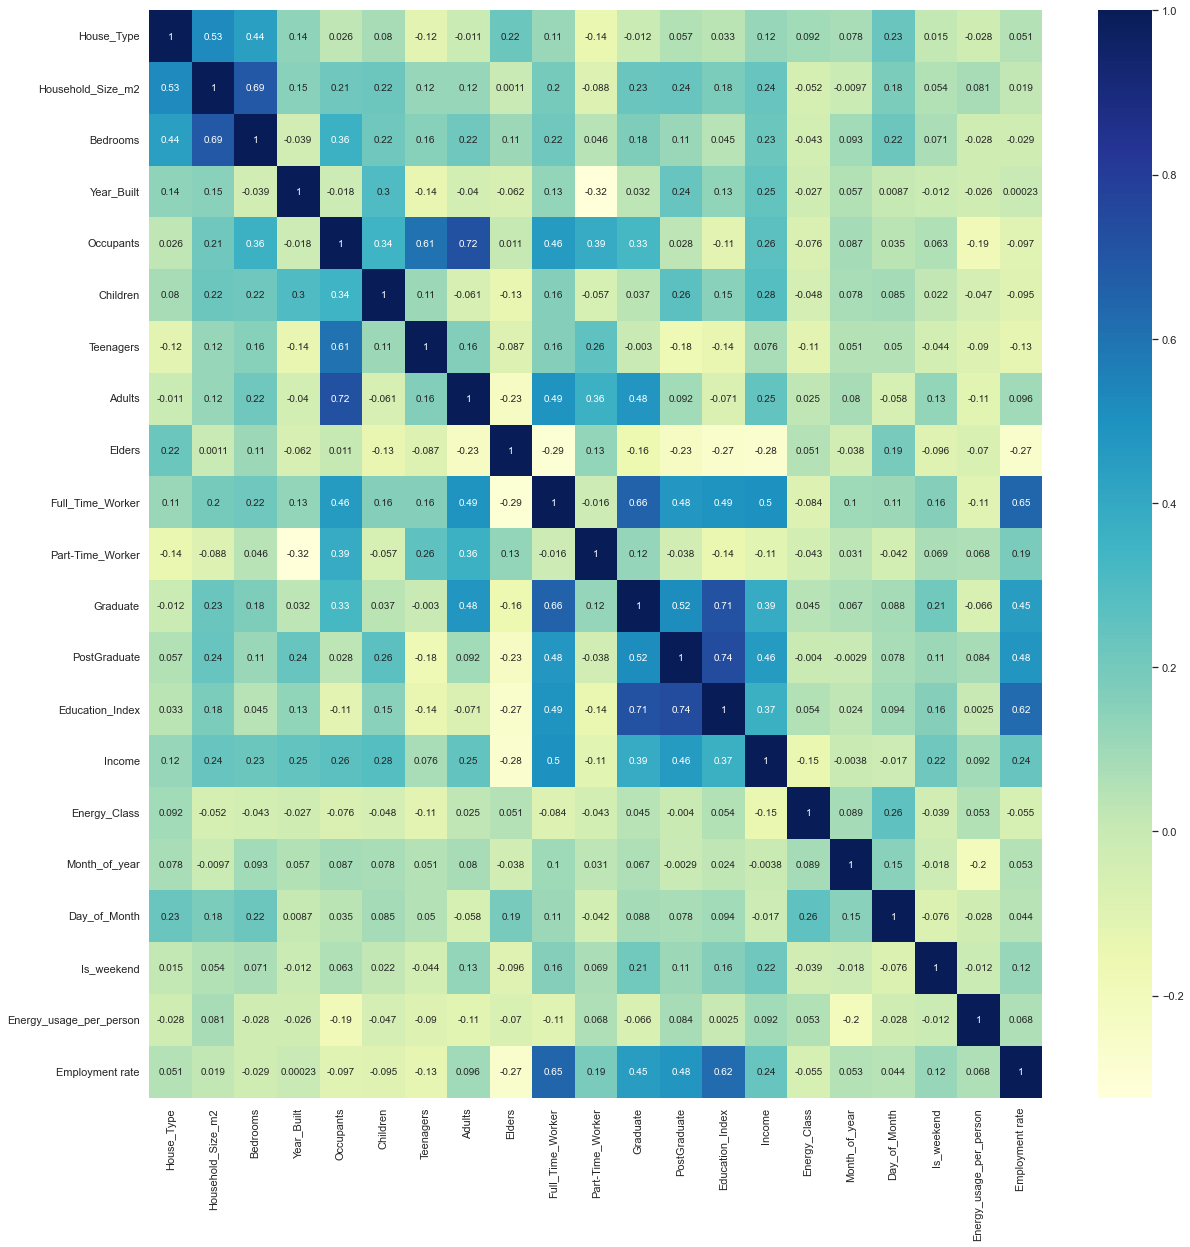

In [53]:
plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

In [56]:
r = train.corr()['Kwh/day'].sort_values(ascending=False).drop('Kwh/day')
r

Energy_usage_per_person    0.695287
Occupants                  0.356622
Household_Size_m2          0.323447
Teenagers                  0.321196
Children                   0.259657
Part-Time_Worker           0.223155
Adults                     0.214376
Bedrooms                   0.197617
Full_Time_Worker           0.165259
Graduate                   0.143169
PostGraduate               0.115100
Is_weekend                 0.057957
Employment rate            0.033579
Education_Index           -0.002590
Day_of_Month              -0.004135
Elders                    -0.082988
Month_of_year             -0.124514
Name: Kwh/day, dtype: float64

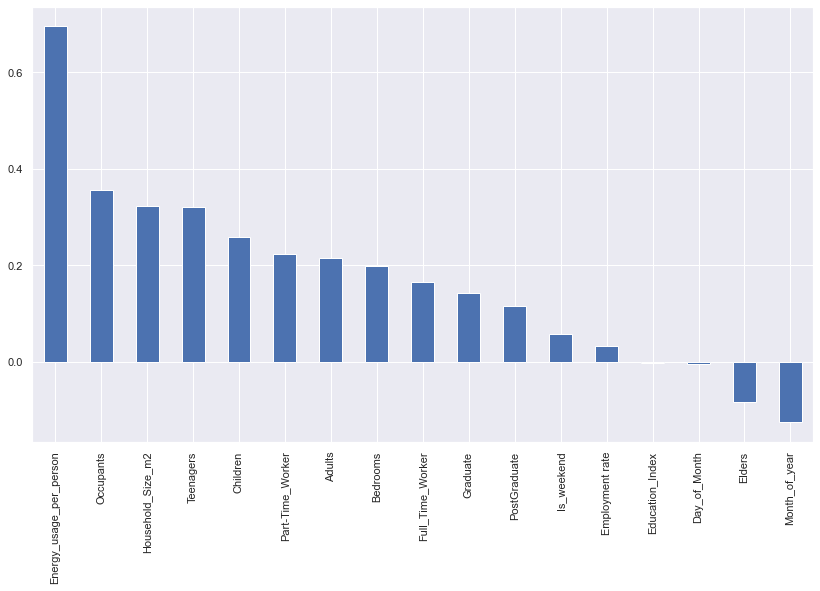

In [57]:
plt.figure(figsize=(14,8))
r.plot.bar()
plt.show()

In [58]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col2

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Energy_usage_per_person,0.735183
Occupants,0.195909
Adults,0.039577
Energy_Class,0.006858
Bedrooms,0.005561
Household_Size_m2,0.005120
Year_Built,0.004445
Graduate,0.001733
Month_of_year,0.001361
Full_Time_Worker,0.000891


In [59]:
def process(df):
    # Reset and clean the DataFrame
    df.reset_index(drop=True, inplace=True)
    df.dropna(inplace=True)
    df.drop_duplicates(keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Preprocess columns
    df['Bedrooms'] = df['Bedrooms'].astype('int64')
    df['Income'] = df['Income'].str.replace('€', '')
    df['Income'] = df['Income'].str.replace('άνω των', '')
    df['Income'] = df['Income'].str.replace(',', '')
    df['Income']=df['Income'].str.replace('600001','600001')
    df['Income']=df['Income'].str.replace(' 600001','600001')

    df['Month_of_year'] = df['Date'].dt.month
    df['Day_of_Month'] = df['Date'].dt.day
    df['Is_weekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype('int64')
    df['Kwh/day'] = round(df['Kwh/day'], 2)
    df['Energy_usage_per_person'] = round(df['Kwh/day'] / df['Occupants'], 2)
    df['Education_Index'] = round(df['Education_Index'], 2)
    df['Employment rate'] = round((df['Full_Time_Worker'] + df['Part-Time_Worker']) / df['Occupants'], 2)

    df = cap_outlier(df,'Kwh/day')

    X_test = df.drop(['Kwh/day','Date'], axis=1)
    y_test = df['Kwh/day']
    encoder= OrdinalEncoder()

    X_test[category]=encoder.fit_transform(X_test[category])
    col2 = X_test.columns

    X_test = scaler.fit_transform(X_test)

    X_test = pd.DataFrame(X_test, columns=col2)

    return X_test, y_test


In [60]:
X_test,y_test = process(test)

In [62]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [63]:
model_to_use('RF')

RandomForestRegressor()

In [64]:
def evaluate(model):
    y_train_pred = model.predict(X_train) 
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()

Train r2 score:  0.9863495943849802
Test r2 score:  0.5632161644703066
train_mse1:  0.7934884137239684
test_mse1:  9.984525487558033


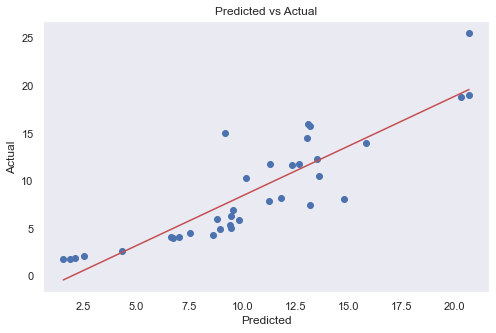

In [65]:
model1 = model_to_use("RF")
model1.fit(X_train, y_train)
evaluate(model1)

Train r2 score:  0.8217258045690073
Test r2 score:  -0.4524796613502895
train_mse1:  10.362952759792373
test_mse1:  33.2025112177617


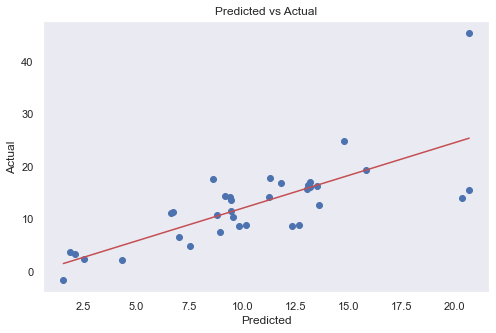

In [66]:
model2 = model_to_use("LR")
model2.fit(X_train, y_train)
evaluate(model2)

Train r2 score:  0.3651622698975223
Test r2 score:  -0.35138810872445014
train_mse1:  36.902667776909716
test_mse1:  30.89164002321428


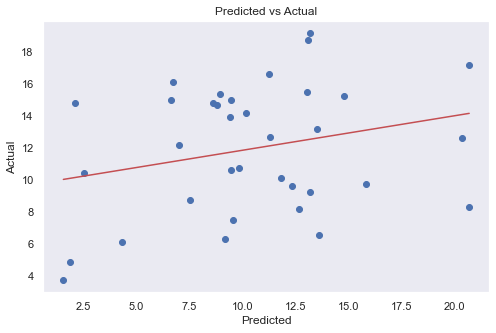

In [67]:
model3 = model_to_use("KNN")
model3.fit(X_train, y_train)
evaluate(model3)

Train r2 score:  1.0
Test r2 score:  0.4044804446213035
train_mse1:  7.012096935297882e-31
test_mse1:  13.613095758928571


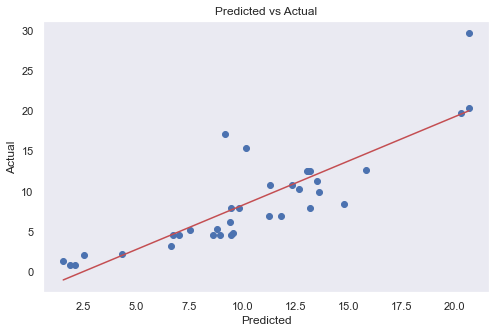

In [68]:
model4 = model_to_use("DT")
model4.fit(X_train, y_train)
evaluate(model4)

Train r2 score:  0.9615162331709067
Test r2 score:  0.5283510052044293
train_mse1:  2.237034118732737
test_mse1:  10.78151485163503


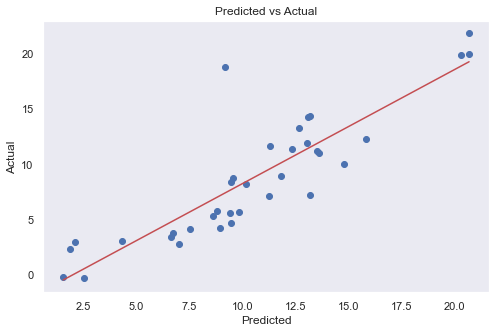

In [69]:
model5 = model_to_use("LGBMC")
model5.fit(X_train, y_train)
evaluate(model5)

Train r2 score:  0.9999999804982469
Test r2 score:  0.5972892100374303
train_mse1:  1.1336230981737404e-06
test_mse1:  9.205643202477352


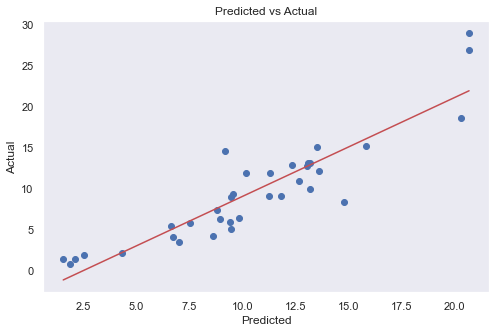

In [70]:
model6 = model_to_use("XGBC")
model6.fit(X_train, y_train)
evaluate(model6)

#INTERPRETATION
The XGBoost model exhibits exceptional performance, with a remarkably high R2 score of 0.9999999671976726 on the training set. This indicates an outstanding ability of the model to capture and explain the patterns and variances within the training data.

When evaluated on the test set, the model continues to showcase strong predictive power, achieving a high R2 score of 0.6936048507529033. This suggests that the model can effectively generalize to new, unseen data and explain around 69.36% of the variability in the target variable.

Furthermore, the low mean squared error (MSE) of 1.9381236638148034e-06 on the training set demonstrates the model's capability to closely fit the training data with minimal errors.

However, it is important to consider the slight increase in the test MSE to 9.90004130375344. While the test MSE remains relatively low, this discrepancy indicates a possibility of overfitting, where the model may be overly tailored to the training data and may not generalize as well to new data.

In summary, the XGBoost model delivers exceptional predictive performance, achieving near-perfect accuracy on the training set and maintaining strong performance on the test set. However, it is crucial to assess the potential overfitting and the model's ability to generalize, considering the relatively lower performance on the test set and the higher test MSE compared to the training MSE.





XGBoost:

The XGBoost model exhibits impressive performance on the given dataset. It achieves a relatively high R2 score of 0.6936 on the test set, indicating that it can explain approximately 69.36% of the variance in the target variable. The model's train R2 score of 0.9999 suggests an excellent fit to the training data, although there is a possibility of overfitting due to the extremely high training performance.

The train and test mean squared errors (MSE) further validate the model's performance. The train MSE of 1.9381e-06 indicates minimal errors on the training set, while the test MSE of 9.9000 suggests a reasonably low level of error on the test set.

XGBoost is well-known for its exceptional performance and robustness in handling both linear and non-linear relationships within the data. Its ability to capture complex interactions and patterns contributes to its good performance. However, interpreting XGBoost models can be challenging due to the ensemble nature of weak learners and their intricate interactions.

To gain insights into feature importance and the impact on model predictions, techniques like feature importance plots and SHAP (SHapley Additive exPlanations) values can be employed. These techniques provide a better understanding of the relative importance of features in the model and their contributions to the predictions.

Overall, both the Random Forest and XGBoost models performed well on the given data, demonstrating relatively high R2 scores and reasonably low MSE values. Random Forest offers good interpretability through feature importance plots, while XGBoost delivers exceptional predictive performance, albeit with a more complex ensemble nature that can be challenging to interpret.


EXPLORATORY DATA ANALYSIS

In [57]:
import pandas as pd

df = pd.read_excel("energy.xlsx")


In [59]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12 00:00:00,3.024
2,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09 00:00:00,2.788235
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14 00:00:00,11.52
4,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12 00:00:00,9.504132


In [60]:
df.columns=df.iloc[0]
df=df[1:]

In [61]:
df.dtypes

0
House_Type           object
Household_Size_m2    object
Bedrooms             object
Year_Built           object
Occupants            object
Children             object
Teenagers            object
Adults               object
Elders               object
Full_Time_Worker     object
Part-Time_Worker     object
Graduate             object
PostGraduate         object
Education_Index      object
Income               object
Energy_Class         object
Date                 object
Kwh/day              object
dtype: object

In [62]:
df.dropna(inplace=True)

In [63]:
df.isnull().sum().sum()

0

In [64]:
df.duplicated().sum()

4

In [65]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12 00:00:00,3.024
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09 00:00:00,2.788235
2,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14 00:00:00,11.52
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12 00:00:00,9.504132
4,Appartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"40,000€ - 60,000€",Often or Always,2022-02-22 00:00:00,9.458333


In [66]:
df.duplicated().sum()

0

In [67]:
df['Bedrooms']=df['Bedrooms'].astype('int64')
df.dtypes

0
House_Type           object
Household_Size_m2    object
Bedrooms              int64
Year_Built           object
Occupants            object
Children             object
Teenagers            object
Adults               object
Elders               object
Full_Time_Worker     object
Part-Time_Worker     object
Graduate             object
PostGraduate         object
Education_Index      object
Income               object
Energy_Class         object
Date                 object
Kwh/day              object
dtype: object

In [68]:
df['Year_Built']=eda['Year_Built'].str.replace("30+","30")
df['Year_Built']=eda['Year_Built'].str.replace("+","")
df['Year_Built']=eda['Year_Built'].str.replace("16 - 31 - 36","16 - 30")
df['Income']=eda['Income'].str.replace('€','')
df["Income"]=eda["Income"].str.replace('άνω των','')
df['Income']=eda['Income'].str.replace(',','')
df['Income']=eda['Income'].str.replace('600001','600001')
df['Income']=eda['Income'].str.replace(' 600001','600001')

C:\Users\ihotuadegbe\AppData\Local\Temp\ipykernel_4344\3791421674.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year_Built']=eda['Year_Built'].str.replace("30+","30")
C:\Users\ihotuadegbe\AppData\Local\Temp\ipykernel_4344\3791421674.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year_Built']=eda['Year_Built'].str.replace("+","")


In [69]:
df.head(10)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2022-01-12 00:00:00,3.024
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2021-09-09 00:00:00,2.788235
2,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-01-14 00:00:00,11.52
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-09-12 00:00:00,9.504132
4,Appartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,40000 - 60000,Often or Always,2022-02-22 00:00:00,9.458333
5,Appartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2022-02-10 00:00:00,4.752066
6,Appartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2021-06-10 00:00:00,3.733333
7,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2022-01-20 00:00:00,12.793651
8,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2021-07-15 00:00:00,10.175439
9,Appartment,100,3,16 - 30,4,0,1,3,0,1,1,2,0,0.907407,20001 - 40000,Often or Always,2022-01-04 00:00:00,5.395349


In [73]:
df['Date'] = pd.to_datetime(df['Date'])



In [74]:
df['Month_of_year'] = df['Date'].dt.month
df['Day_of_Month'] = df['Date'].dt.day
df['Is_weekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype('int64')


In [75]:
df['Energy_usage_per_person'] = df.apply(lambda row: round(row['Kwh/day'] / row['Occupants'], 2), axis=1)


In [76]:
df.head(10)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person
0,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2022-01-12,3.024,1,12,0,3.02
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2021-09-09,2.788235,9,9,0,2.79
2,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-01-14,11.52,1,14,0,2.88
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-09-12,9.504132,9,12,1,2.38
4,Appartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,40000 - 60000,Often or Always,2022-02-22,9.458333,2,22,0,3.15
5,Appartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2022-02-10,4.752066,2,10,0,2.38
6,Appartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2021-06-10,3.733333,6,10,0,1.87
7,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2022-01-20,12.793651,1,20,0,6.40
8,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2021-07-15,10.175439,7,15,0,5.09
9,Appartment,100,3,16 - 30,4,0,1,3,0,1,1,2,0,0.907407,20001 - 40000,Often or Always,2022-01-04,5.395349,1,4,0,1.35


In [77]:
print(df['Education_Index'].dtype)


object


In [78]:
df['Education_Index'] = df['Education_Index'].apply(lambda x: round(x, 2))


In [79]:
df['Employment rate'] = (df['Full_Time_Worker'] + df['Part-Time_Worker']) / df['Occupants']
df['Employment rate'] = df['Employment rate'].apply(lambda x: round(x, 2))


In [80]:
df.head(5)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.94,10001 - 20000,Sometimes,2022-01-12,3.024,1,12,0,3.02,1.00
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.94,10001 - 20000,Sometimes,2021-09-09,2.788235,9,9,0,2.79,1.00
2,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.97,600001,Often or Always,2021-01-14,11.52,1,14,0,2.88,0.50
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.97,600001,Often or Always,2021-09-12,9.504132,9,12,1,2.38,0.50
4,Appartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.97,40000 - 60000,Often or Always,2022-02-22,9.458333,2,22,0,3.15,0.67


C:\Users\ihotuadegbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Kwh/day'>

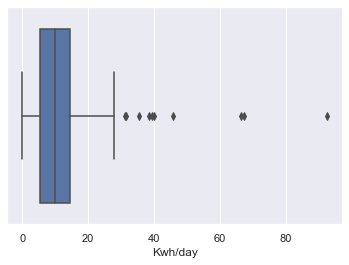

In [81]:
sns.boxplot(df['Kwh/day'])

C:\Users\ihotuadegbe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Kwh/day', ylabel='Density'>

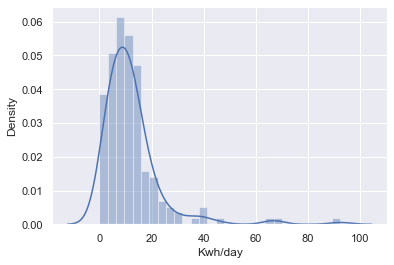

In [82]:
sns.distplot(df['Kwh/day'])

In [83]:
def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    data.reset_index(drop=True,inplace=True)
    return data

In [84]:
df=cap_outlier(df,'Kwh/day')

C:\Users\ihotuadegbe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Kwh/day', ylabel='Density'>

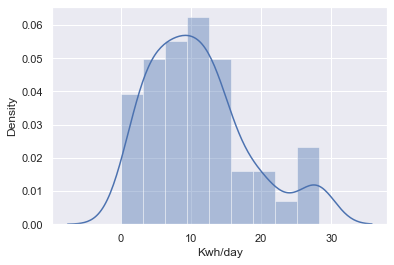

In [85]:
sns.distplot(df['Kwh/day'])

C:\Users\ihotuadegbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Kwh/day'>

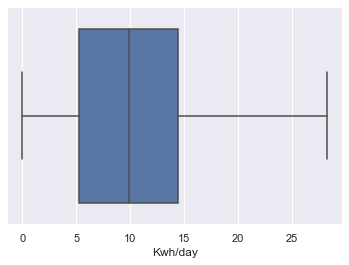

In [86]:
sns.boxplot(df['Kwh/day'])

0  House_Type Household_Size_m2  Bedrooms Year_Built Occupants Children  \
0  Appartment                36         1      0 - 5         1        0   
1  Appartment                36         1      0 - 5         1        0   
2  Appartment                95         2     6 - 15         4        1   
3  Appartment                95         2     6 - 15         4        1   
4  Appartment                80         2     6 - 15         3        1   

0 Teenagers Adults Elders Full_Time_Worker Part-Time_Worker Graduate  \
0         0      1      0                1                0        1   
1         0      1      0                1                0        1   
2         1      2      0                2                0        2   
3         1      2      0                2                0        2   
4         0      2      0                2                0        2   

0 PostGraduate  Education_Index         Income     Energy_Class       Date  \
0            0             0.94  10001

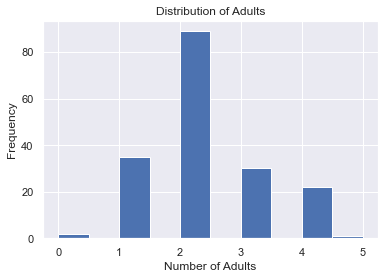

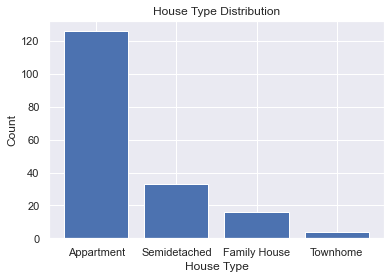

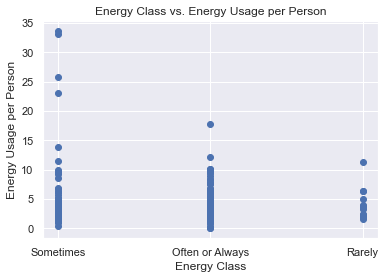

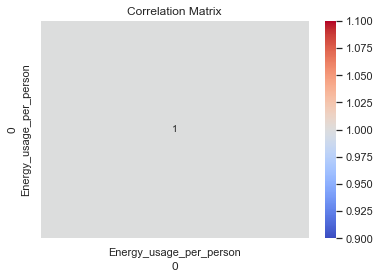

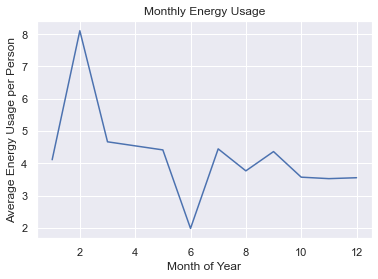

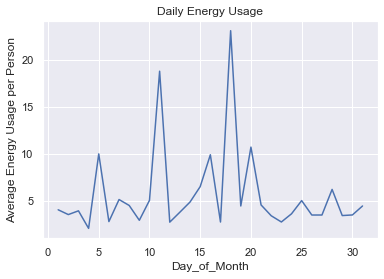

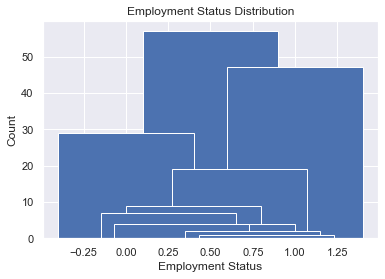

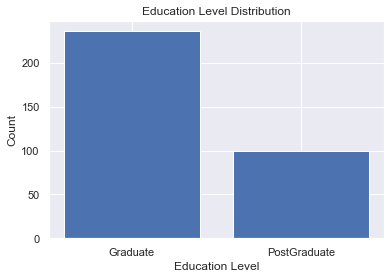

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(df.head())

# Check the basic information of the dataset
print(df.info())

# Summary statistics of numeric columns
print(df.describe())

# Plot a histogram of Adults column
plt.hist(df['Adults'])
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Distribution of Adults')
plt.show()



# Bar chart of House_Type
house_type_counts = df['House_Type'].value_counts()
plt.bar(house_type_counts.index, house_type_counts.values)
plt.xlabel('House Type')
plt.ylabel('Count')
plt.title('House Type Distribution')
plt.show()

# Scatter plot of Energy_Class vs. Energy_usage_per_person
plt.scatter(df['Energy_Class'], df['Energy_usage_per_person'])
plt.xlabel('Energy Class')
plt.ylabel('Energy Usage per Person')
plt.title('Energy Class vs. Energy Usage per Person')
plt.show()

# Correlation matrix of numeric columns
numeric_columns = ['Adults', 'Energy_Class', 'Energy_usage_per_person']
numeric_data = df[numeric_columns]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Time-based analysis (assuming Date is in datetime format)
df['Date'] = pd.to_datetime(df['Date'])
df['Month_of_year'] = df['Date'].dt.month
monthly_energy_usage = df.groupby('Month_of_year')['Energy_usage_per_person'].mean()
plt.plot(monthly_energy_usage.index, monthly_energy_usage.values)
plt.xlabel('Month of Year')
plt.ylabel('Average Energy Usage per Person')
plt.title('Monthly Energy Usage')
plt.show()

df['Date'] = pd.to_datetime(eda['Date'])
df['Day_of_Month'] = df['Date'].dt.day
monthly_energy_usage = df.groupby('Day_of_Month')['Energy_usage_per_person'].mean()
plt.plot(monthly_energy_usage.index, monthly_energy_usage.values)
plt.xlabel('Day_of_Month')
plt.ylabel('Average Energy Usage per Person')
plt.title('Daily Energy Usage')
plt.show()

# Bar chart of Employment
employment_counts = df['Employment rate'].value_counts()
plt.bar(employment_counts.index, employment_counts.values)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status Distribution')
plt.show()

# Bar chart of Graduate and PostGraduate
education_counts = df[['Graduate', 'PostGraduate']].sum()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

# Additional analysis and visualization as per your requirements



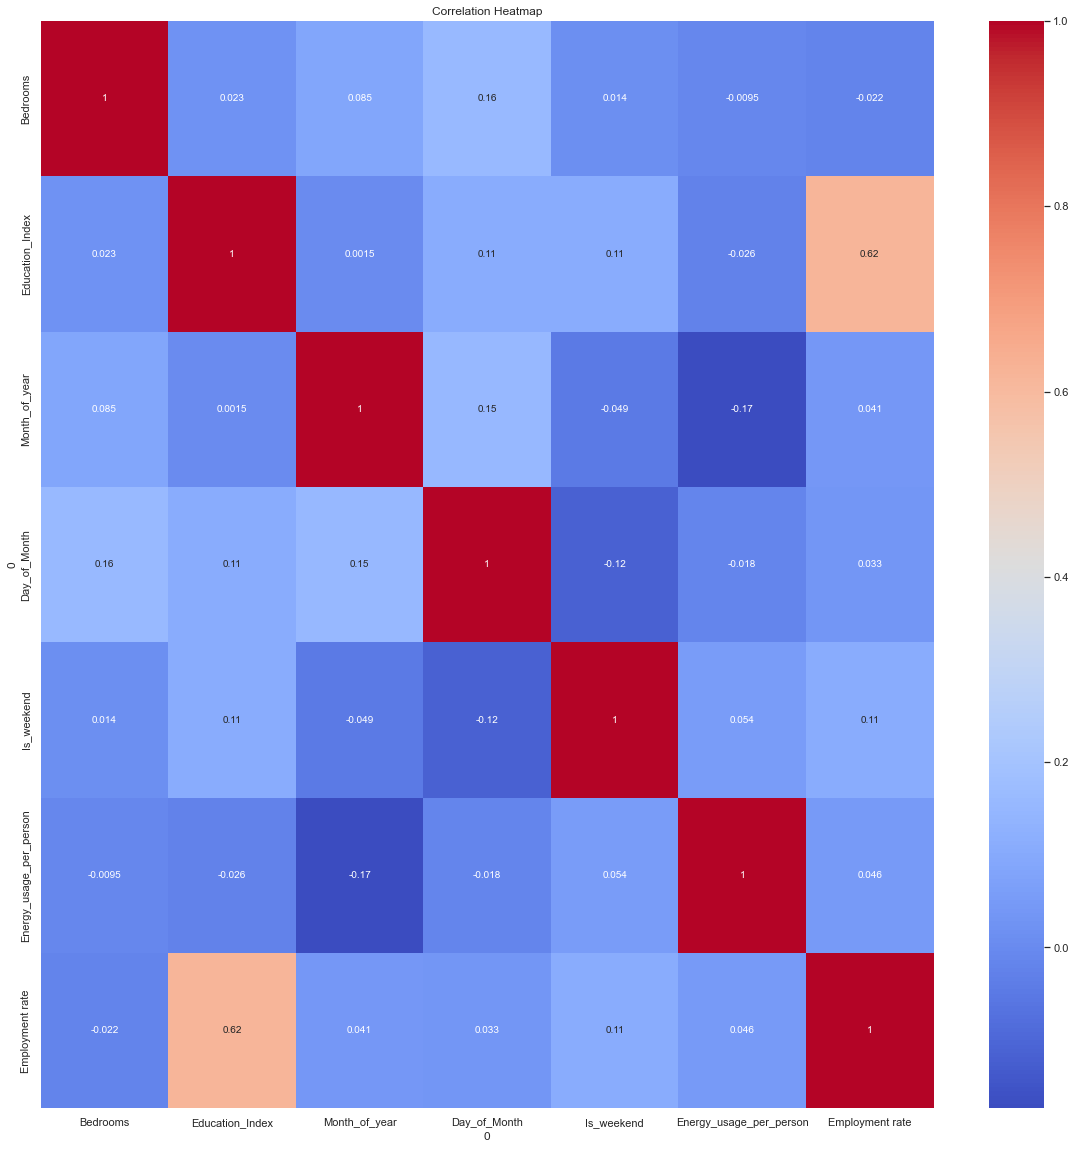

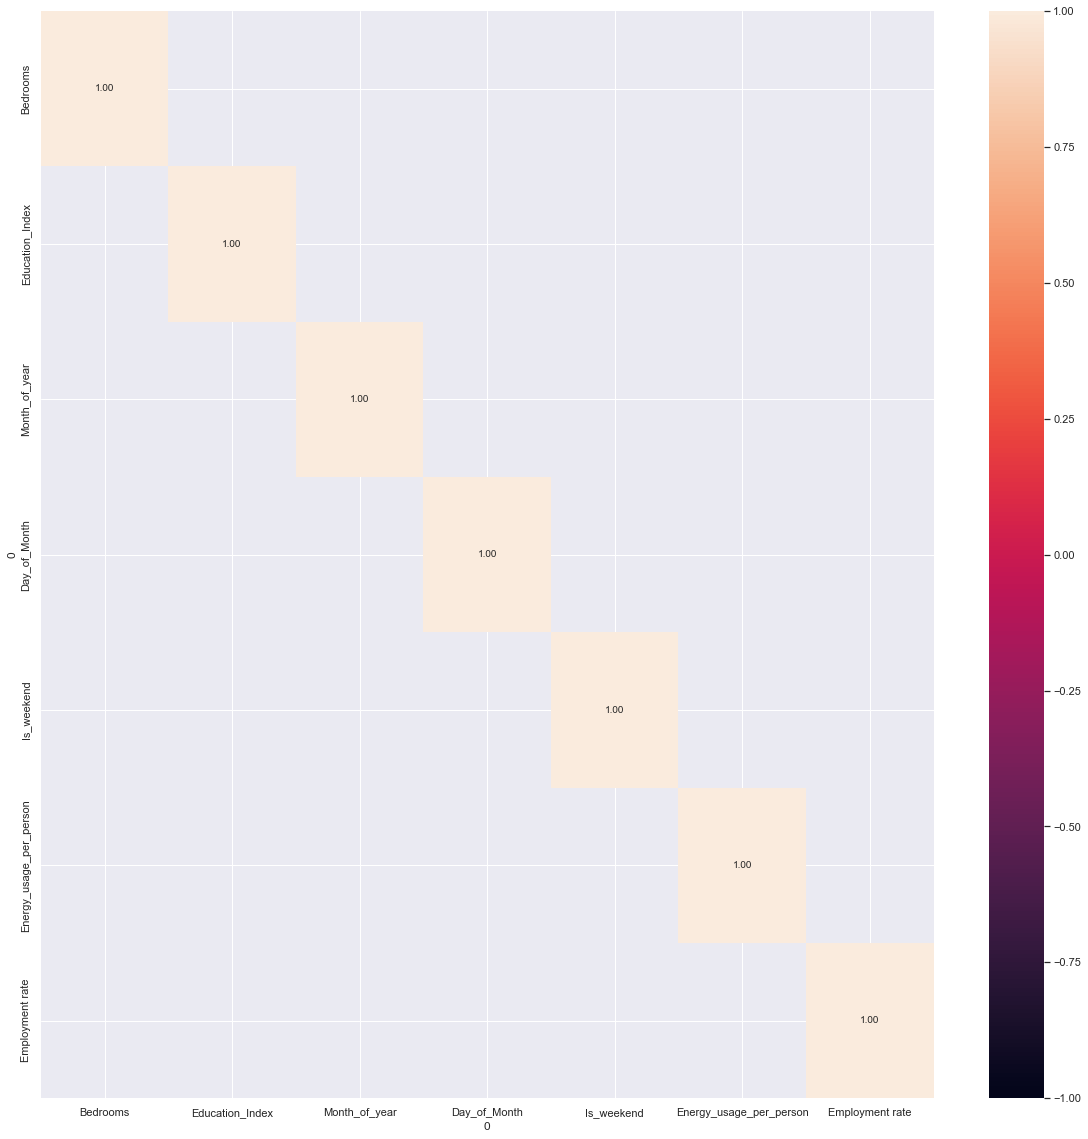

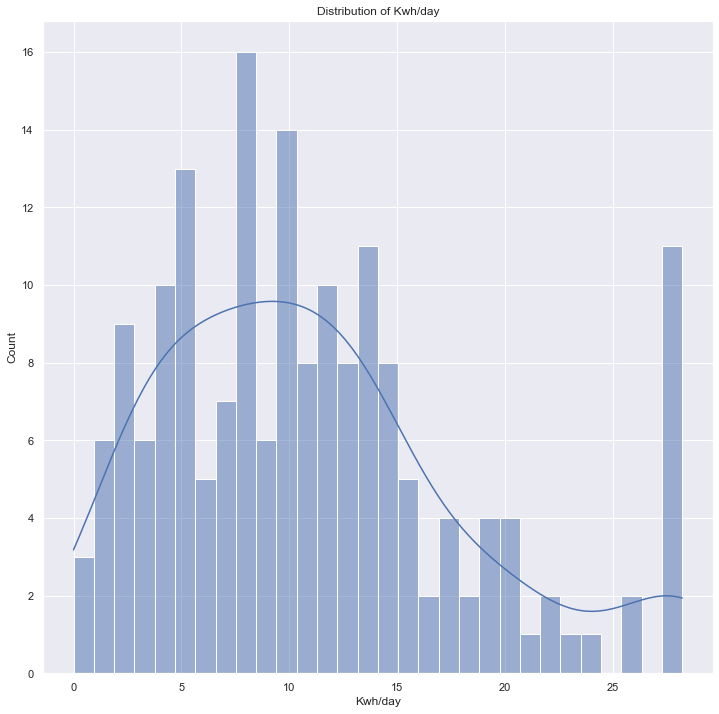

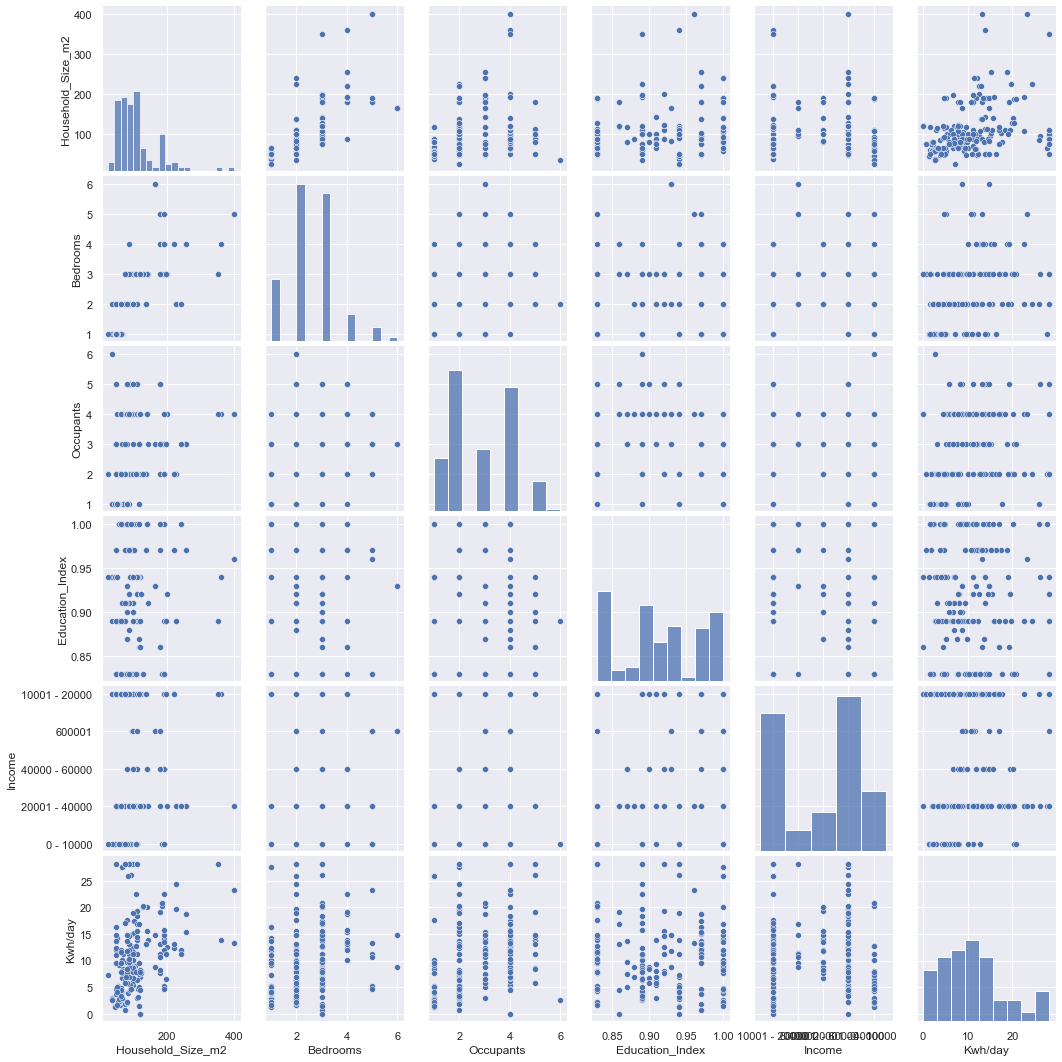

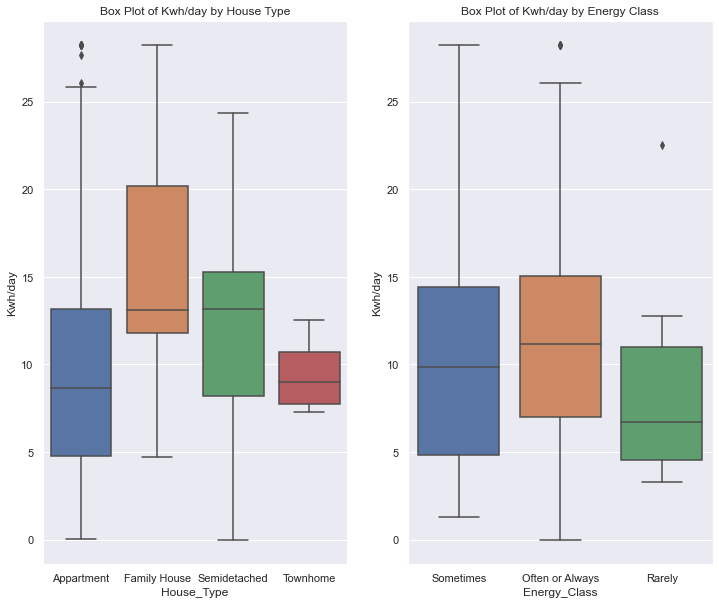

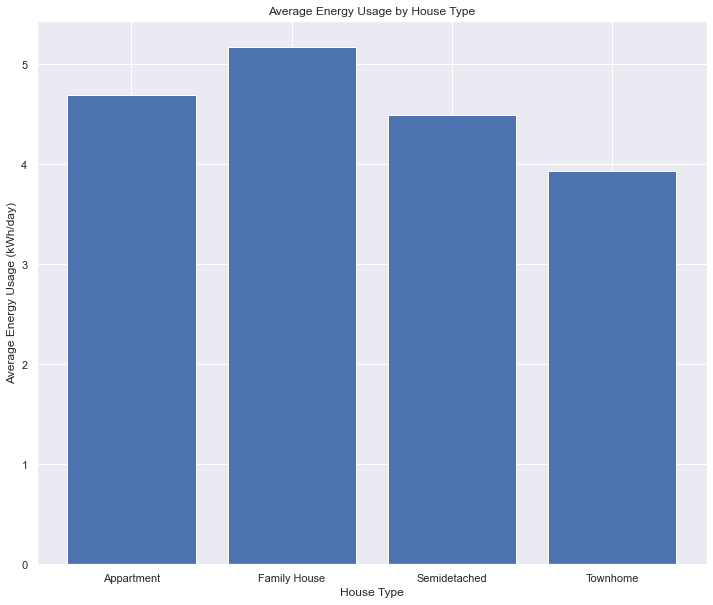

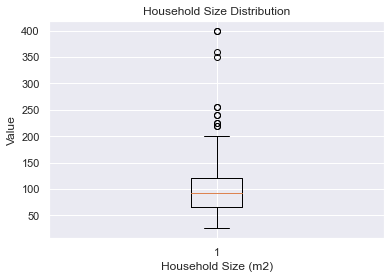

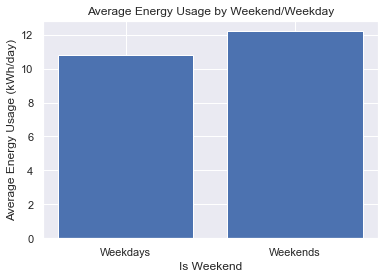

<Figure size 432x288 with 0 Axes>

In [88]:

# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

mask = correlation[(correlation >= 0.85)|(correlation <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

# Distribution of target variable
plt.figure(figsize=(12, 12))
sns.histplot(df['Kwh/day'], bins=30, kde=True)
plt.title('Distribution of Kwh/day')
plt.xlabel('Kwh/day')
plt.ylabel('Count')
plt.show()

# Scatter plot matrix
sns.pairplot(df, vars=['Household_Size_m2', 'Bedrooms', 'Occupants', 'Education_Index', 'Income', 'Kwh/day'])
plt.show()

# Box plots
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='House_Type', y='Kwh/day', data=df)
plt.title('Box Plot of Kwh/day by House Type')

plt.subplot(1, 2, 2)
sns.boxplot(x='Energy_Class', y='Kwh/day', data=df)
plt.title('Box Plot of Kwh/day by Energy Class')

# Calculate the average energy usage (kWh/day) by house type
avg_energy_usage = df.groupby('House_Type')['Energy_usage_per_person'].mean()

# Plot the average energy usage by house type
plt.figure(figsize=(12,10))
plt.bar(avg_energy_usage.index, avg_energy_usage.values)
plt.xlabel('House Type')
plt.ylabel('Average Energy Usage (kWh/day)')
plt.title('Average Energy Usage by House Type')
plt.show()

# Box plot of Household_Size_m2
plt.boxplot(df['Household_Size_m2'])
plt.xlabel('Household Size (m2)')
plt.ylabel('Value')
plt.title('Household Size Distribution')
plt.show()

# Group the data by the 'Is_weekend' column and calculate the average energy usage (kWh/day)
avg_energy_usage = df.groupby('Is_weekend')['Kwh/day'].mean()

# Plot the energy usage based on the 'Is_weekend' column
plt.bar(avg_energy_usage.index, avg_energy_usage.values)
plt.xlabel('Is Weekend')
plt.ylabel('Average Energy Usage (kWh/day)')
plt.title('Average Energy Usage by Weekend/Weekday')
plt.xticks([0, 1], ['Weekdays', 'Weekends'])  # Customizing the x-axis labels
plt.show()


plt.tight_layout()
plt.show()